In [1]:
from datetime import datetime as dt
import uuid 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
df = pickle.load( open( "./cleaned_dataset.p", "rb" ) )

In [3]:
len(df.index)

2566296

In [4]:
len(df.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


197686

In [5]:
c = df.groupby('UUID').filter(lambda g: (g.action_cleaned == 'start_chat').any())

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [7]:
with open('chat_sessions.p', 'wb') as f:
    pickle.dump(c, f)

In [2]:
c = pickle.load( open( "./chat_sessions.p", "rb" ) )

In [9]:
len(c.index)

351251

In [10]:
len(c.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


15874

In [27]:
len(c.groupby('UUID')) / len(df.groupby('UUID')) 

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


0.08029906012565381

In [36]:
c['sequence'] = c.groupby(['UUID']).cumcount() + 1

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [26]:
num_items_before_chat = c[c.action_cleaned == 'start_chat']

In [80]:
def define_session_start_time(x):
    st = x.start_time.iloc[0]
    x['session_start_time'] = st
    return x

c = c.groupby(['UUID']).apply(define_session_start_time)

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [102]:
c['time_since_start'] = (c['start_time'] - c['session_start_time'])  / np.timedelta64(1, 'm')

In [103]:
ch = c[c.action_cleaned == 'start_chat']

In [104]:
ch.head(5)

Unnamed: 0  visit_id  sequence  \
UUID                                                                           
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819       370566  23943166        31   
                                     361821       370568  23943166        33   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329       413999  23987090         2   
0010bf1e-a447-4118-a391-27827adad04b 1562745     1597971  26186992        10   
00173c57-9282-4452-afcd-7fba9c453a81 1709336     1748363  26513923         2   

                                                      start_time  \
UUID                                                               
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819  2018-05-03 14:18:17   
                                     361821  2018-05-03 14:18:29   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329  2018-05-04 09:05:34   
0010bf1e-a447-4118-a391-27827adad04b 1562745 2018-06-19 09:06:19   
00173c57-9282-4452-afcd-7fba9c453a81 1709336 2018-06-25 08:50:21   

                                              event_duration  \
UUID                                                           
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819        13.867000   
                                     361821         6.806000   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329         5.575000   
0010bf1e-a447-4118-a391-27827adad04b 1562745      351.911987   
00173c57-9282-4452-afcd-7fba9c453a81 1709336      194.039993   

                                                                                            url  \
UUID                                                                                              
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819   https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     361821   https://www.telenor.no/bedrift/minbedrift/beta/#/   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329   https://www.telenor.no/bedrift/minbedrift/beta/#/   
0010bf1e-a447-4118-a391-27827adad04b 1562745  https://www.telenor.no/bedrift/minbedrift/beta...   
00173c57-9282-4452-afcd-7fba9c453a81 1709336  https://www.telenor.no/bedrift/minbedrift/beta/#/   

                                                       action  \
UUID                                                            
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819   click on "chat"   
                                     361821   click on "chat"   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329   click on "chat"   
0010bf1e-a447-4118-a391-27827adad04b 1562745  click on "chat"   
00173c57-9282-4452-afcd-7fba9c453a81 1709336  click on "chat"   

                                                               country  \
UUID                                                                     
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819       Norway - Oslo - Oslo   
                                     361821       Norway - Oslo - Oslo   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329   Norway - Hedmark - Hamar   
0010bf1e-a447-4118-a391-27827adad04b 1562745                    Norway   
00173c57-9282-4452-afcd-7fba9c453a81 1709336                    Norway   

                                              user_client user_client_family  \
UUID                                                                           
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819   Chrome 66.0             Chrome   
                                     361821   Chrome 66.0             Chrome   
000b4791-ca61-4a39-a0c5-ed16132c9d7d 404329           NaN                NaN   
0010bf1e-a447-4118-a391-27827adad04b 1562745      IE 11.0                 IE   
00173c57-9282-4452-afcd-7fba9c453a81 1709336  Chrome 67.0             Chrome   

                                                   ...        hour DOW  \
UUID                                               ...                   
00010ecb-cbe3-4916-9aeb-40df14b41d88 361819        ...          14   3   
                                     361821        ...          14   3   
000b4791-ca61-4a39-a0c5-ed16132c9

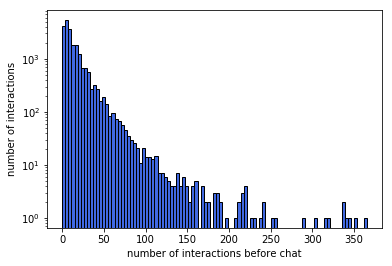

In [109]:
bins = np.linspace(0,ch.sequence.max(),100)
n, bins, pathces = plt.hist(x=ch.sequence.dropna(),bins=bins,log=True,color='royalblue',edgecolor='black')
#plt.xticks(bins)
plt.xlabel('number of interactions before chat')
plt.ylabel('number of interactions')

plt.savefig("img/events_before_chat.pdf", bbox_inches='tight')
plt.show()

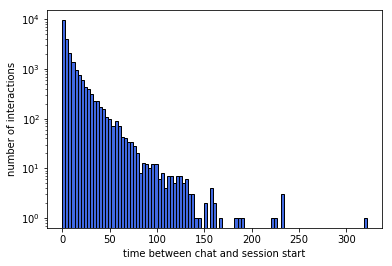

In [110]:
bins = np.linspace(0,ch.time_since_start.max(),100)
n, bins, pathces = plt.hist(x=ch.time_since_start.dropna(),bins=bins,log=True,color='royalblue',edgecolor='black')
plt.xlabel('time between chat and session start')
plt.ylabel('number of interactions')

plt.savefig("img/time_between_chat_and_session_start.pdf", bbox_inches='tight')
plt.show()

In [101]:
p = ch['time_since_start'].minutes

AttributeError: 'Series' object has no attribute 'minutes'